### Load Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import files
import re
# from google.colab import drive
# drive.mount('/content/drive')

# Load data from CSV file in Google Drive (if using colab)
# df = pd.read_csv("/content/drive/MyDrive/fake_job_postings.csv")
# drive.mount("/content/drive", force_remount=True)

# If local, load directly
df = pd.read_csv("fake_job_postings.csv")

Mounted at /content/drive
Mounted at /content/drive


### Pre-Processing

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
# Understanding the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
print(df.describe())

             job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
# Check for duplicates based on 'description' and 'title'
duplicate_rows = df.duplicated(subset=['description', 'title'], keep='first').sum()

duplicate_rows

2093

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates(subset=['description', 'title'], keep='first')

In [ ]:
# Define columns to fill with mode
text_columns = ['company_profile', 'description', 'requirements', 'benefits']
categorical_columns = ['department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

In [ ]:
# Fill missing values for text and categorical columns with their mode
for column in text_columns + categorical_columns:
    mode_value = df[column].mode()[0] if not df[column].mode().empty else 'Unknown'
    df[column] = df[column].fillna(mode_value)


# Handle 'location' and 'salary_range' separately using mode
location_mode = df['location'].mode()[0]
salary_range_mode = df['salary_range'].mode()[0]

df['location'] = df['location'].fillna(location_mode)
df['salary_range'] = df['salary_range'].fillna(salary_range_mode)


# Check to ensure missing values are filled
df.isnull().sum().sum()

# All Good!

0

### Exploratory Data Analysis

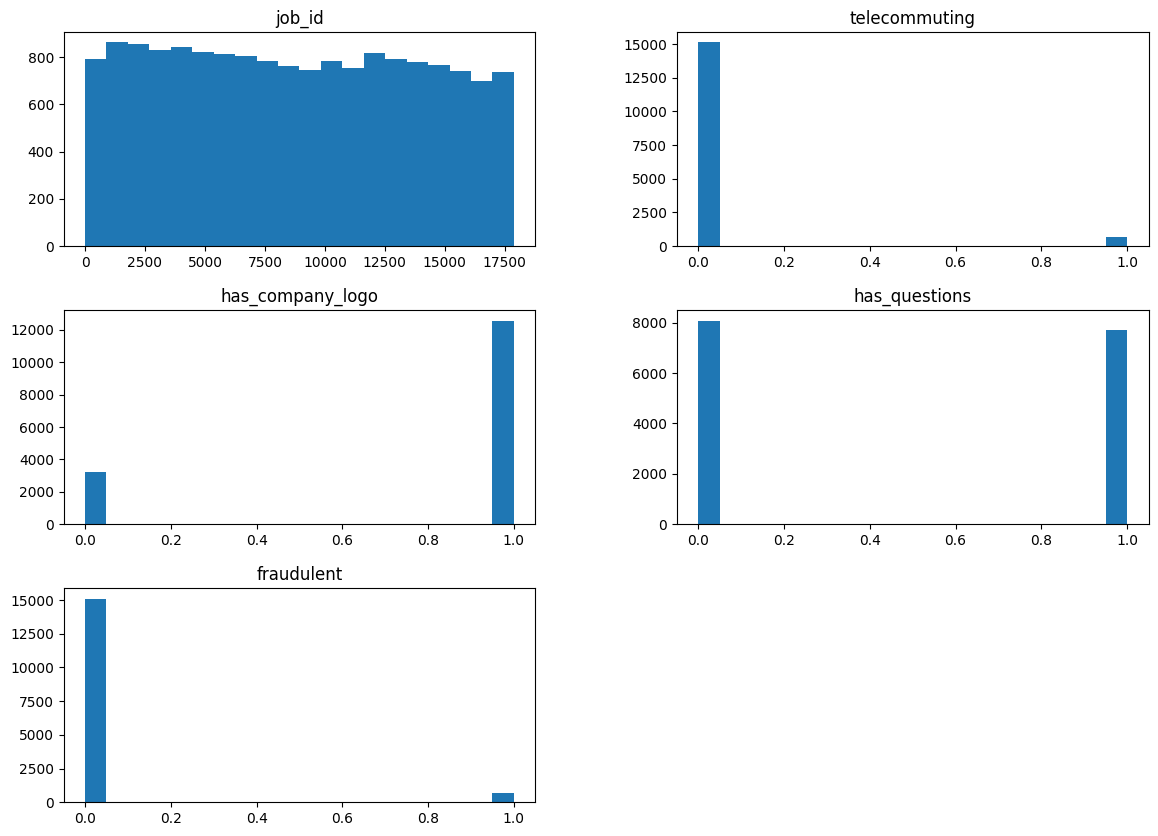

In [ ]:
# Distribution of for numerical variables.
# Many are 0 or 1. Job_id does not make sense to look at the distribution.
df.hist(bins=20, figsize=(14,10), grid=False)
plt.show()

# Fradulent: 0 means fake, 1 means real

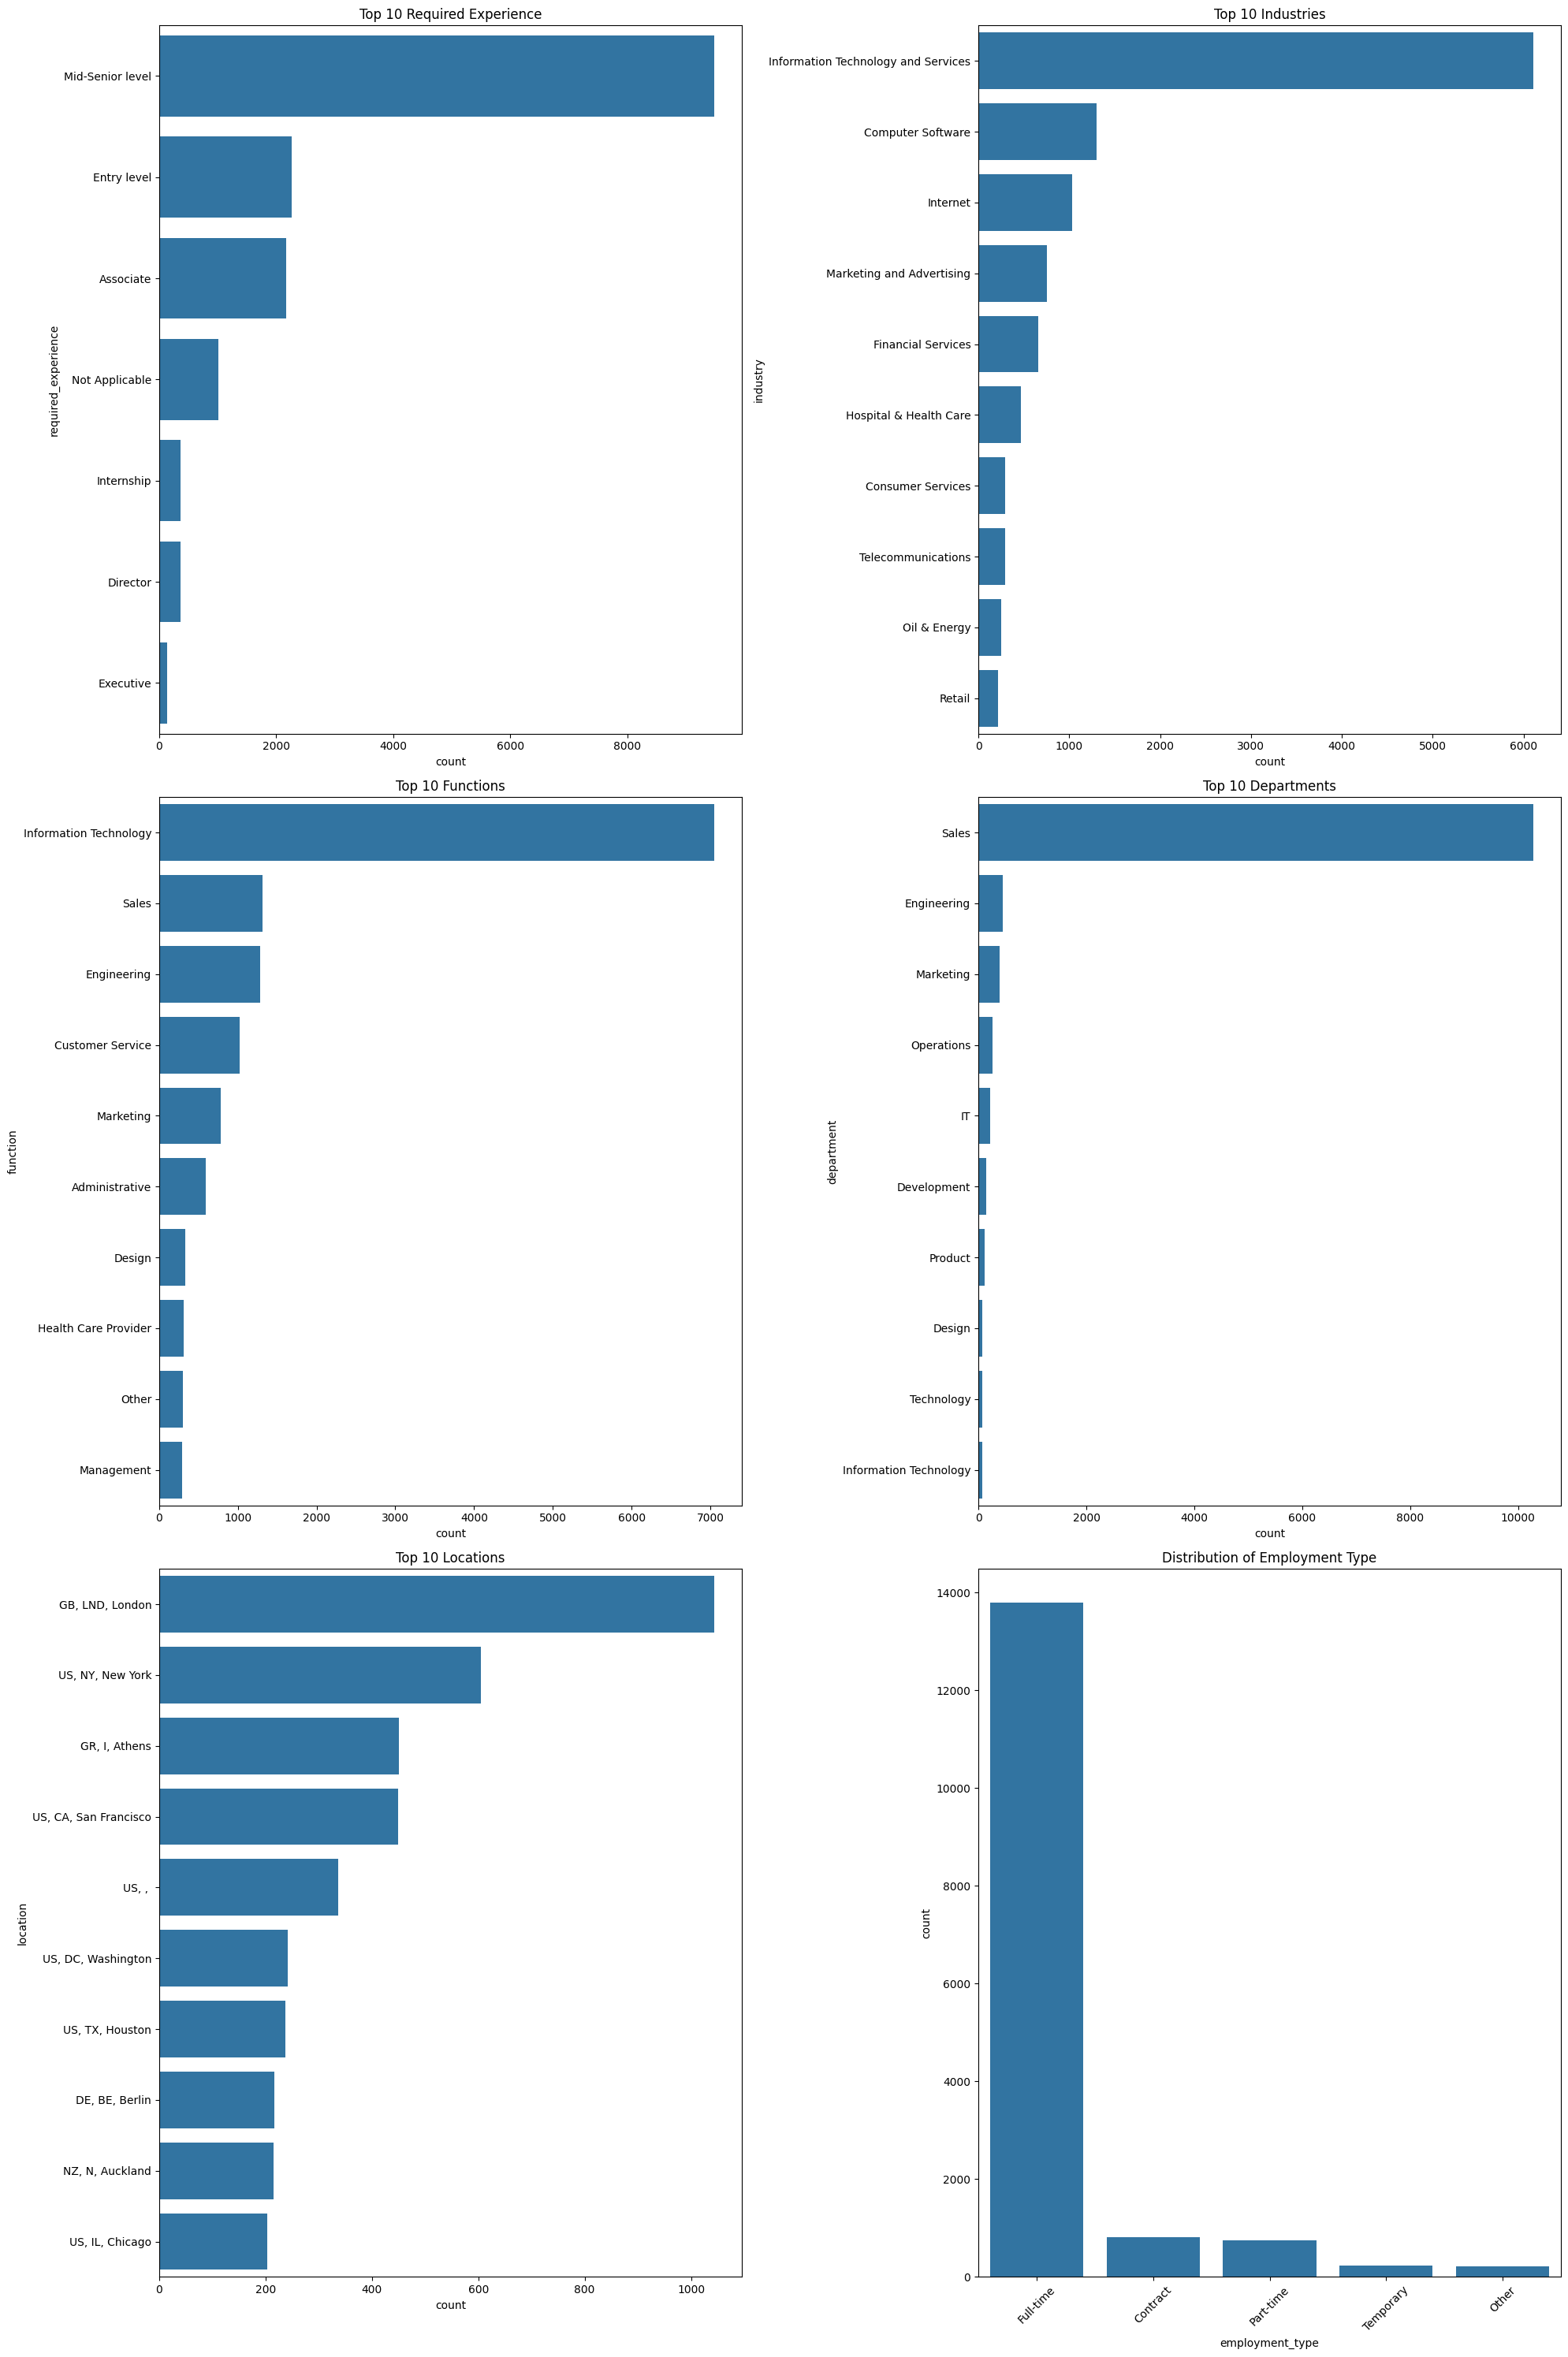

In [ ]:
# Visualizing the categorical columns

plt.figure(figsize=(20, 30))

# Define top 10 categories to display for each subplot
TOP_N = 10

# 'required_experience'
plt.subplot(3, 2, 1)
top_experience = df['required_experience'].value_counts().index[:TOP_N]
sns.countplot(y=df['required_experience'], order=top_experience)
plt.title('Top 10 Required Experience')

# 'industry'
plt.subplot(3, 2, 2)
top_industries = df['industry'].value_counts().index[:TOP_N]
sns.countplot(y=df['industry'], order=top_industries)
plt.title('Top 10 Industries')

# 'function'
plt.subplot(3, 2, 3)
top_functions = df['function'].value_counts().index[:TOP_N]
sns.countplot(y=df['function'], order=top_functions)
plt.title('Top 10 Functions')

# 'department'
plt.subplot(3, 2, 4)
top_departments = df['department'].value_counts().index[:TOP_N]
sns.countplot(y=df['department'], order=top_departments)
plt.title('Top 10 Departments')

# 'location'
plt.subplot(3, 2, 5)
top_locations = df['location'].value_counts().index[:TOP_N]
sns.countplot(y=df['location'], order=top_locations)
plt.title('Top 10 Locations')

# 'employment_type'
plt.subplot(3, 2, 6)
sns.countplot(data=df, x='employment_type', order=df['employment_type'].value_counts().index)
plt.title('Distribution of Employment Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


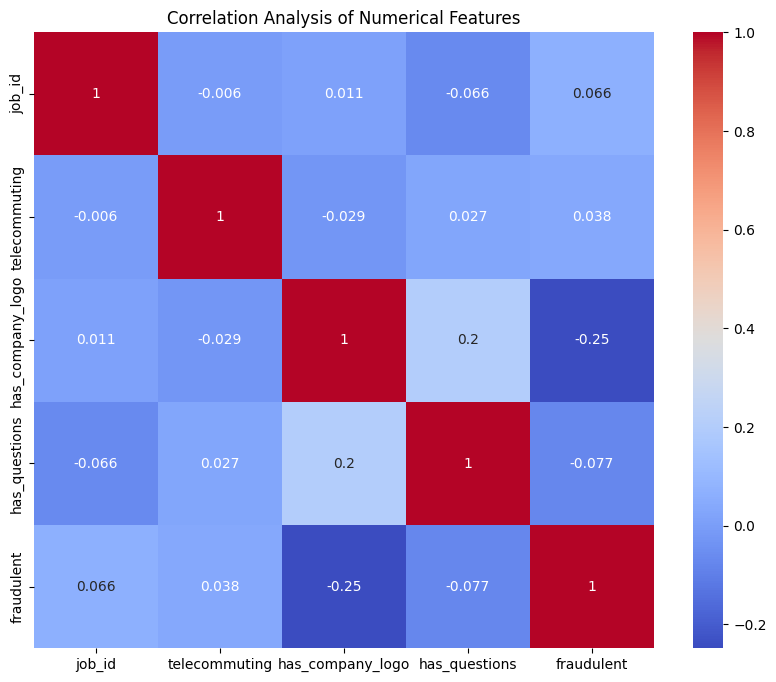

In [ ]:
# Correlation Analysis (Including job_id doesn't make sense...)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis of Numerical Features')
plt.show()


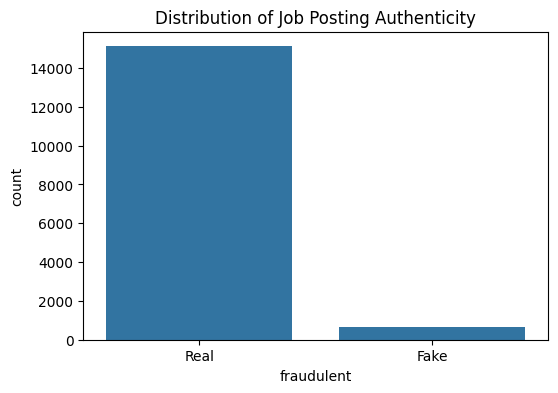

In [ ]:
# Analysis of Job Posting Authenticity (We already have a similar visualization in the prior code block.)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='fraudulent')
plt.title('Distribution of Job Posting Authenticity')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()

In [ ]:
# Word Frequency Histograms


from sklearn.feature_extraction.text import CountVectorizer

# Function to plot top N most common words in the job descriptions
def plot_top_n_words(text_df, title, n=20):
    # Initialize CountVectorizer
    cv = CountVectorizer(stop_words='english')
    words_matrix = cv.fit_transform(text_df)
    sum_words = words_matrix.sum(axis=0)

    # Words frequency
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Data for plotting
    top_words = words_freq[:n]
    top_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=top_df, palette='plasma')
    plt.title(title)
    plt.show()


In [ ]:
# Separate real and fraudulent job descriptions
real_descriptions = df[df['fraudulent'] == 0]['description']
fraudulent_descriptions = df[df['fraudulent'] == 1]['description']


<ipython-input-18-1be0bdb44234>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_df, palette='plasma')


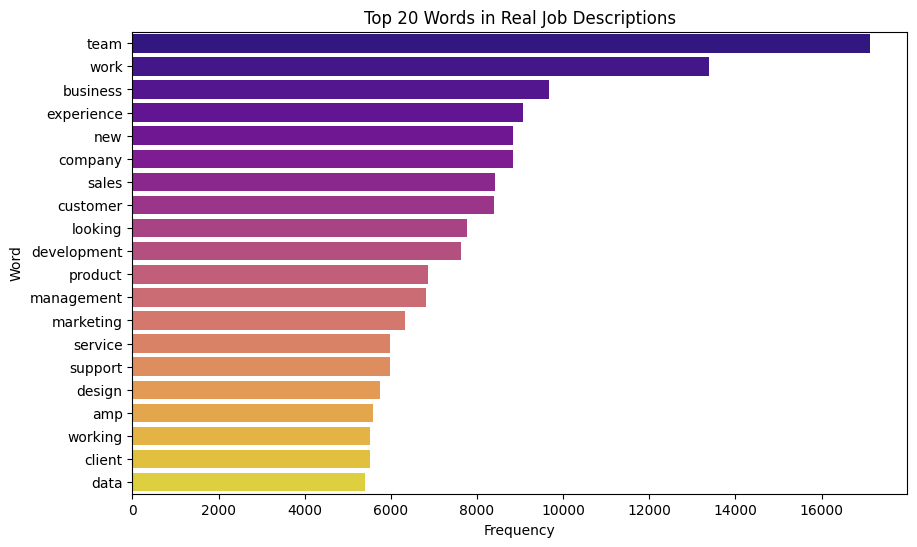

In [ ]:
# Plot for real job descriptions
plot_top_n_words(real_descriptions, 'Top 20 Words in Real Job Descriptions')

<ipython-input-18-1be0bdb44234>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_df, palette='plasma')


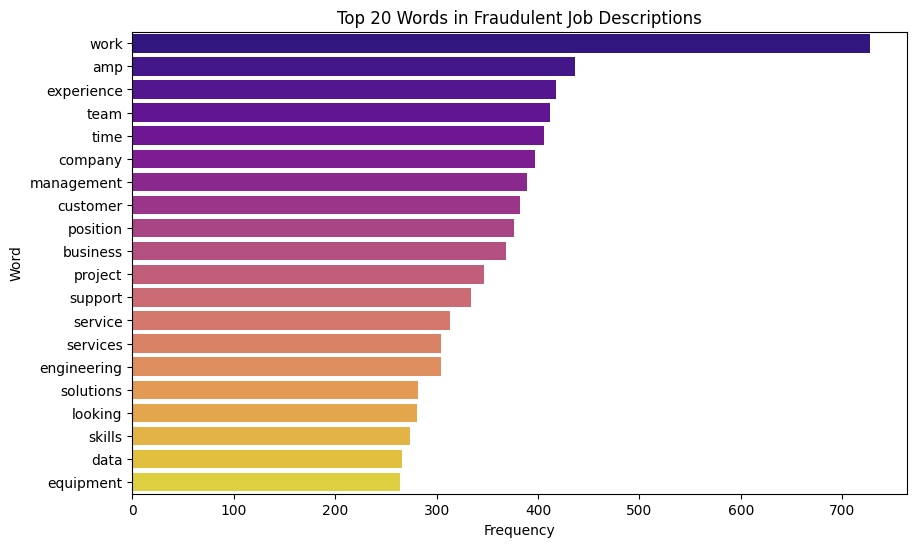

In [ ]:
# Plot for fraudulent job descriptions
plot_top_n_words(fraudulent_descriptions, 'Top 20 Words in Fraudulent Job Descriptions')


<ipython-input-18-1be0bdb44234>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_df, palette='plasma')


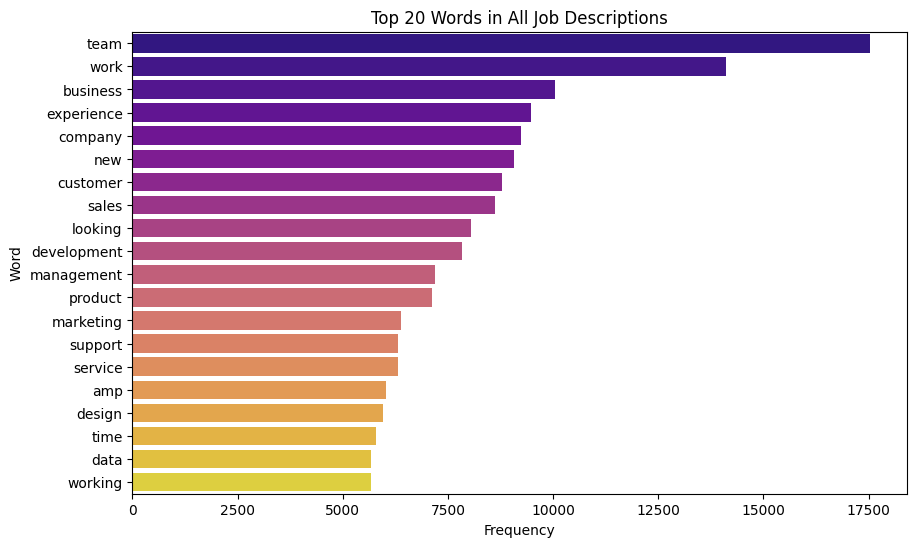

In [ ]:
# Plot for all job descriptions
plot_top_n_words(df['description'], 'Top 20 Words in All Job Descriptions')

In [ ]:
# Word Cloud

# We can also make word clouds to visualize the prevalence of words in a different way
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
# Generate a word cloud for the top 20 words in all job descriptions
all_descriptions = ' '.join(df['description'])

# Initialize CountVectorizer with stop words set to English and limit to top 20 features
cv = CountVectorizer(stop_words='english', max_features=20)  # Limit to top 20 words
words_matrix = cv.fit_transform([all_descriptions])
sum_words = words_matrix.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_dict = dict(words_freq)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_freq_dict)


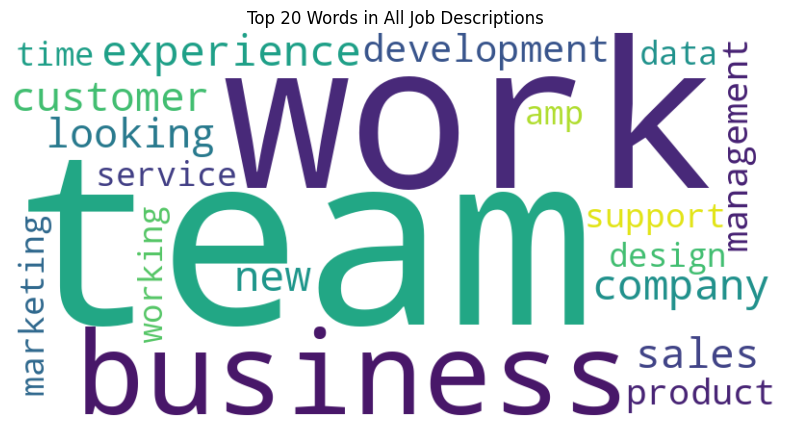

In [ ]:
# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Words in All Job Descriptions')
plt.show()


In [ ]:
# Distributions

# Check distribution using histogram
# We can use the frequency of telecommuting (when it's =1) to make histograms
# Let's filter dfset for rows where telecommuting is 1
telecommuting_df = df[df['telecommuting'] == 1]


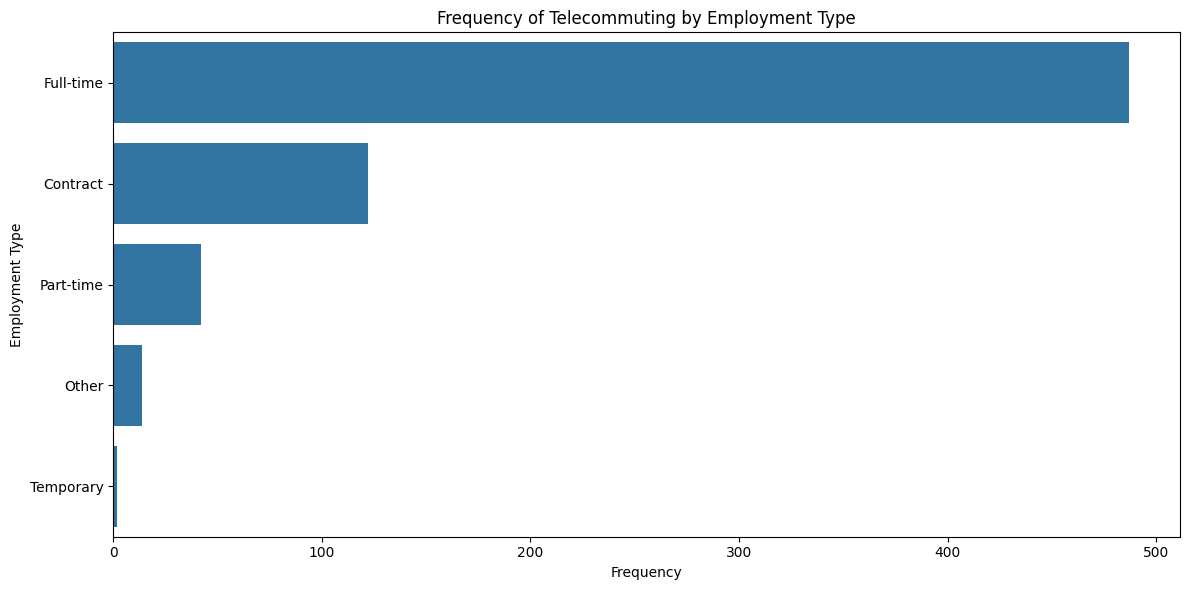

In [ ]:
# Histogram of how prevalent telecommuting is for each employment type
plt.figure(figsize=(12, 6))
sns.countplot(data=telecommuting_df, y='employment_type', order = telecommuting_df['employment_type'].value_counts().index)
plt.title('Frequency of Telecommuting by Employment Type')
plt.xlabel('Frequency')
plt.ylabel('Employment Type')
plt.tight_layout()
plt.show()

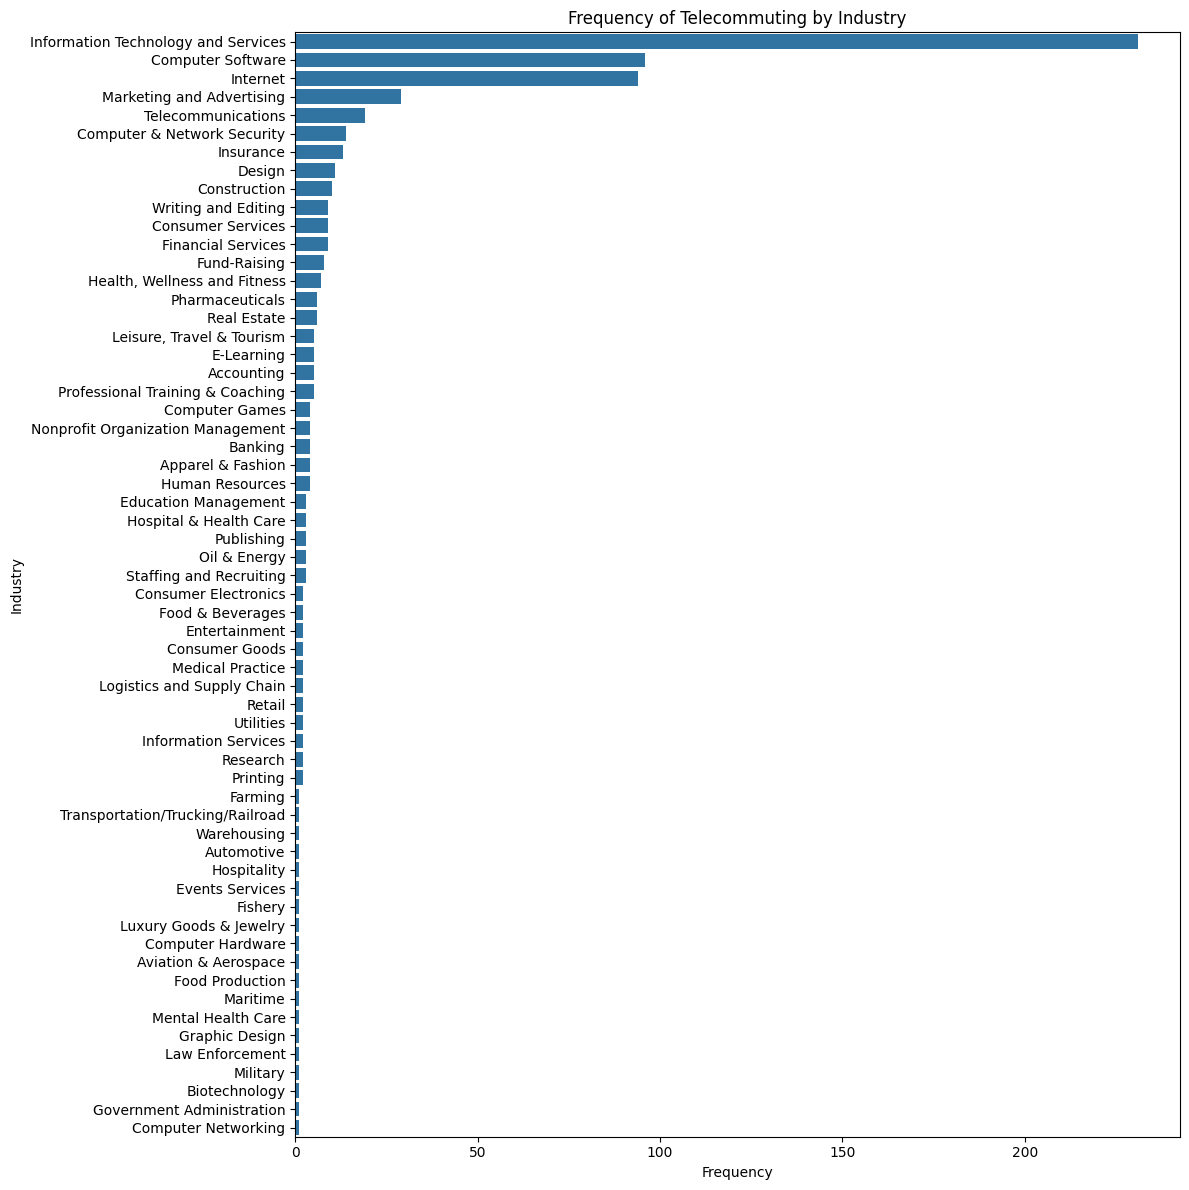

In [ ]:
# Histogram of how prevalent telecommuting is per industry
plt.figure(figsize=(12, 12))
sns.countplot(data=telecommuting_df, y='industry', order = telecommuting_df['industry'].value_counts().index)
plt.title('Frequency of Telecommuting by Industry')
plt.xlabel('Frequency')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

In [ ]:
# Now let's filter dfset for rows where telecommuting is 1
questions_df = df[df['has_questions'] == 1]


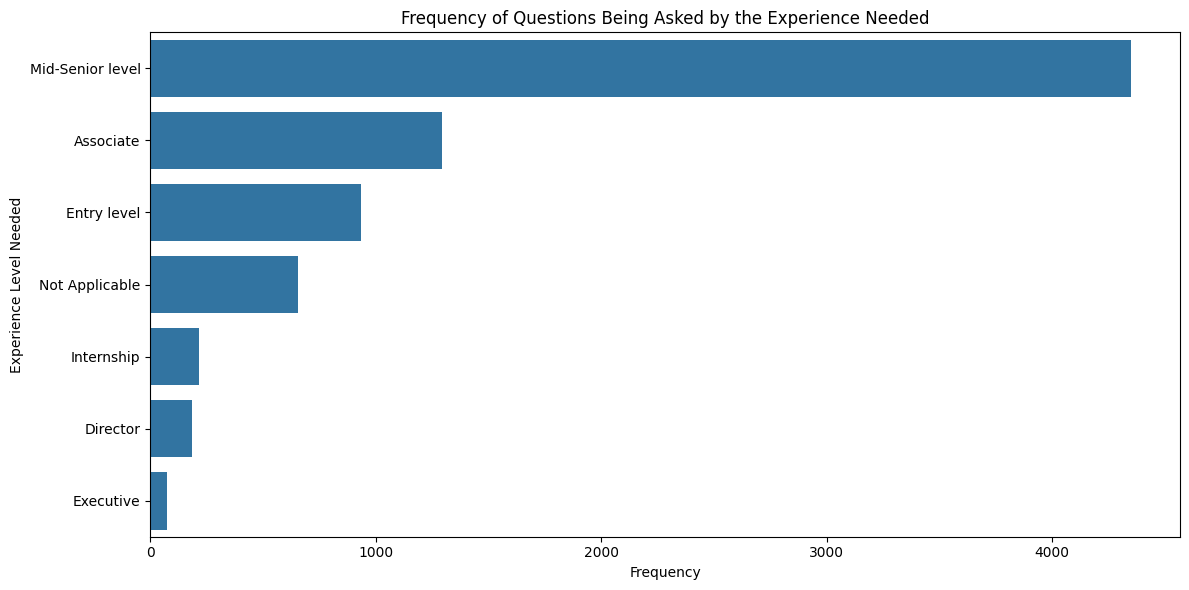

In [ ]:
# Histogram of how prevalent questions being asked are the level of experienced needed
plt.figure(figsize=(12, 6))
sns.countplot(data=questions_df, y='required_experience', order = questions_df['required_experience'].value_counts().index)
plt.title('Frequency of Questions Being Asked by the Experience Needed')
plt.xlabel('Frequency')
plt.ylabel('Experience Level Needed')
plt.tight_layout()
plt.show()

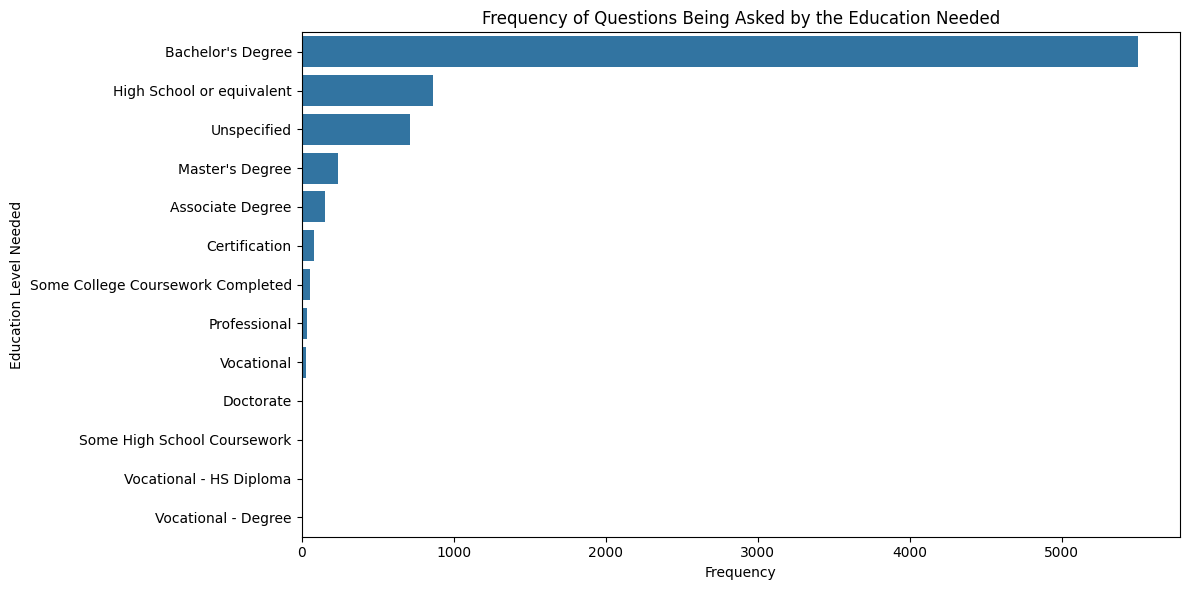

In [ ]:
# Histogram of how prevalent questions being asked are the level of experienced needed
plt.figure(figsize=(12, 6))
sns.countplot(data=questions_df, y='required_education', order = questions_df['required_education'].value_counts().index)
plt.title('Frequency of Questions Being Asked by the Education Needed')
plt.xlabel('Frequency')
plt.ylabel('Education Level Needed')
plt.tight_layout()
plt.show()

### Hyperparameter Identification with Naïve Bayes


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [ ]:
# Splitting into training and testing

X = df['description']
y = df['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Define a Pipeline
# Choose vectorizer and classifier, e.g., TfidfVectorizer and MultinomialNB
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB()),  # Or any other classifier
])

# Parameters for GridSearchCV
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'clf__alpha': (0.01, 0.1, 1),  # Parameter for MultinomialNB
}

In [ ]:
# GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': (0.01, 0.1, 1),
                         'vect__max_df': (0.5, 0.75, 1.0),
                         'vect__ngram_range': ((1, 1), (1, 2))},
             verbose=2)

In [ ]:
# Best parameters and best score
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


Best score: 0.975
Best parameters set:
	clf__alpha: 0.01
	vect__max_df: 0.5
	vect__ngram_range: (1, 2)


In [ ]:
# Predictions and evaluation
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4551
           1       0.85      0.50      0.63       186

    accuracy                           0.98      4737
   macro avg       0.91      0.75      0.81      4737
weighted avg       0.97      0.98      0.97      4737



### Hyperparameter Identification with Logistic Regression

In [ ]:
# Re-splitting the data
X = df['description']  # Example feature column
y = df['fraudulent']   # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define a pipeline with a vectorizer and a classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(random_state=42)),
])

# Define the parameter grid
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [0.95, 0.9],
    'tfidf__min_df': [0.01, 0.05],
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2']
}

In [ ]:
# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10], 'clf__penalty': ['l2'],
                         'tfidf__max_df': [0.95, 0.9],
                         'tfidf__min_df': [0.01, 0.05],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy')

In [ ]:
# Best parameters and scores
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'clf__C': 10, 'clf__penalty': 'l2', 'tfidf__max_df': 0.95, 'tfidf__min_df': 0.01, 'tfidf__ngram_range': (1, 2)}
Best score: 0.967772567280481


In [ ]:
# Evaluate on test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3022
           1       0.79      0.35      0.49       136

    accuracy                           0.97      3158
   macro avg       0.88      0.67      0.74      3158
weighted avg       0.96      0.97      0.96      3158

